In [1]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Study2_recoverd_param_lerch_voss_mean_median.csv')

In [3]:
df.insert(5, "v_total = (v2 + v1)-(v3+v4)", (df['v1_mean']+df['v2_mean'])-(df['v3_mean']+df['v4_mean']), True)


In [4]:
df.insert(6, "v_bias = (v2 + v1)+ (v3+v4)", (df['v1_mean']+df['v2_mean'])+(df['v3_mean']+df['v4_mean']), True)


In [5]:
df.insert(7, "v_w_priming = (v2 - v1)", (df['v1_mean']-df['v2_mean']), True)
df.insert(8, "v_nw_priming = (v4 - v3)", (df['v4_mean']-df['v3_mean']), True)




In [6]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [7]:
df

,Experiment,v1_mean,v2_mean,v3_mean,v4_mean,v_total = (v2 + v1)-(v3+v4),v_bias = (v2 + v1)+ (v3+v4),v_w_priming = (v2 - v1),v_nw_priming = (v4 - v3),zr_mean,...,v3_median,v4_median,zr_median,a_median,ndt1_median,ndt2_median,ndt3_median,ndt4_median,sndt_median,alpha_median
0,1010_associative_priming_part_2.dat,1.657301,1.095961,-1.688869,-1.281330,5.723461,-0.216937,0.561341,0.407538,0.471715,...,-1.653873,-1.255281,0.465051,0.949830,0.559650,0.567803,0.549293,0.549282,0.060992,1.801197
1,2013_associative_priming_part_2.dat,1.909587,2.360618,-2.109468,-2.145208,8.524882,0.015530,-0.451031,-0.035739,0.470965,...,-2.079374,-2.090498,0.462441,0.958097,0.522524,0.539591,0.480753,0.508340,0.053841,1.718826
2,4010_associative_priming_part_2.dat,2.609628,2.624245,-2.505433,-2.564424,10.303730,0.164016,-0.014616,-0.058991,0.452263,...,-2.503838,-2.549852,0.435993,1.611975,0.536738,0.491337,0.477080,0.505530,0.022168,1.863112
3,4006_associative_priming_part_1.dat,2.457990,2.750365,-3.013038,-2.678524,10.899917,-0.483208,-0.292375,0.334514,0.446476,...,-2.991829,-2.642764,0.432800,1.360850,0.508486,0.512588,0.478650,0.517321,0.024819,1.793738
4,1001_associative_priming_part_2.dat,3.488903,2.776075,-3.430081,-2.849159,12.544218,-0.014262,0.712827,0.580922,0.453841,...,-3.412445,-2.822810,0.441301,1.435158,0.497459,0.454633,0.487556,0.497477,0.020914,1.828874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3034_associative_priming_part_1.dat,2.300798,2.129863,-2.747390,-1.718363,8.896413,-0.035092,0.170935,1.029028,0.450663,...,-2.715397,-1.687330,0.437356,1.023915,0.565708,0.535112,0.493667,0.526828,0.039937,1.689084
252,3026_associative_priming_part_2.dat,2.521772,2.537974,-3.657501,-2.577676,11.294923,-1.175430,-0.016202,1.079825,0.445816,...,-3.644076,-2.560006,0.431484,1.180124,0.530999,0.499098,0.463917,0.497870,0.019700,1.780128
253,1005_associative_priming_part_1.dat,2.291836,1.916858,-2.016892,-1.803942,8.029529,0.387860,0.374978,0.212949,0.426205,...,-2.002802,-1.784734,0.410361,1.898149,0.574655,0.547334,0.463959,0.496966,0.014776,1.907089
254,1021_associative_priming_part_2.dat,2.003999,1.987010,-2.094305,-1.586185,7.671499,0.310519,0.016988,0.508120,0.459300,...,-2.075504,-1.545810,0.447639,1.061746,0.536891,0.538348,0.551083,0.546464,0.048131,1.730241


In [8]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('part_1.')]
df_word_part_2 = df[df['Experiment'].str.contains('part_2.')]
df_word_part_1=df_word_part_1.sort_values('Experiment')
df_word_part_2=df_word_part_2.sort_values('Experiment')


In [9]:
colum = [ 'v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'v_total = (v2 + v1)-(v3+v4)',
 'v_bias = (v2 + v1)+ (v3+v4)',
 'v_w_priming = (v2 - v1)',
 'v_nw_priming = (v4 - v3)',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',]

In [10]:
df_word_part_1_distinct=df_word_part_1.sort_values('Experiment')[colum]

In [11]:
df_word_part_2_distinct=df_word_part_2.sort_values('Experiment')[colum]

# ttest

In [12]:
data_1=df_word_part_1_distinct
data_2=df_word_part_2_distinct
import pingouin as pg

def ttest(data_1,data_2) :
    df = pd.DataFrame([])
    for column in data_1 :
        if column == "Experiment":
            continue
        x1, x2 = data_1[column], data_2[column]
        x1_mean = x1.mean()
        x1_std = x1.std()
        x2_mean = x2.mean()
        x2_std = x2.std()

        res = pg.ttest(x1, x2, paired=True)
        res.insert(loc=0, column='parameter', value=column)
        res.insert(loc=1,column='mean_s1',value=x1_mean)
        res.insert(loc=2,column='std_s1',value=x1_std)
        res.insert(loc=3,column='mean_s2',value=x2_mean)
        res.insert(loc=4,column='std_s2',value=x2_std)

        df = df.append(res)



    df = df.round(4)
    return(df)


In [13]:
resses=ttest(data_1,data_2)
resses.to_excel("ttest_restest_study2_s1s2.xlsx")
resses


/tmp/ipykernel_80396/2206785221.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_80396/2206785221.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_80396/2206785221.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_80396/2206785221.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_80396/2206785221.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_80396/220678522

,parameter,mean_s1,std_s1,mean_s2,std_s2,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,v1_mean,2.3193,0.5225,2.6044,0.5860,-7.0680,127,two-sided,0.0000,"[-0.36, -0.21]",0.5135,9.353e+07,0.9999
T-test,v2_mean,2.2777,0.4898,2.5284,0.5373,-6.5703,127,two-sided,0.0000,"[-0.33, -0.18]",0.4876,8.127e+06,0.9998
T-test,v3_mean,-2.2229,0.5250,-2.4685,0.5742,5.7256,127,two-sided,0.0000,"[0.16, 0.33]",0.4465,1.595e+05,0.9989
T-test,v4_mean,-2.0554,0.4091,-2.2893,0.5195,6.6074,127,two-sided,0.0000,"[0.16, 0.3]",0.5002,9.722e+06,0.9999
T-test,v_total = (v2 + v1)-(v3+v4),8.8753,1.6892,9.8906,1.8929,-9.2301,127,two-sided,0.0000,"[-1.23, -0.8]",0.5660,7.995e+12,1.0000
T-test,v_bias = (v2 + v1)+ (v3+v4),0.3187,0.7252,0.3749,0.7927,-0.7810,127,two-sided,0.4363,"[-0.2, 0.09]",0.0740,0.132,0.1321
T-test,v_w_priming = (v2 - v1),0.0416,0.3032,0.0760,0.4293,-0.7818,127,two-sided,0.4358,"[-0.12, 0.05]",0.0925,0.132,0.1799
T-test,v_nw_priming = (v4 - v3),0.1675,0.3609,0.1792,0.4165,-0.2793,127,two-sided,0.7805,"[-0.1, 0.07]",0.0302,0.102,0.0633
T-test,zr_mean,0.4472,0.0161,0.4494,0.0166,-1.3633,127,two-sided,0.1752,"[-0.01, 0.0]",0.1355,0.242,0.3307
T-test,a_mean,1.4880,0.3667,1.3368,0.3398,8.1383,127,two-sided,0.0000,"[0.11, 0.19]",0.4276,2.287e+10,0.9978


# Distinct

In [14]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [15]:
colum_EX = [ 'Experiment','v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'v_total = (v2 + v1)-(v3+v4)',
 'v_bias = (v2 + v1)+ (v3+v4)',
 'v_w_priming = (v2 - v1)',
 'v_nw_priming = (v4 - v3)',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',]

In [16]:
from scipy.stats import pearsonr

from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

def calculate_corr(df):
    dfcols = pd.DataFrame(columns=df.columns)
    corr = dfcols.transpose().join(dfcols, how='outer')
    corr_frame = pd.DataFrame()
    ind_all = []
    for r in df.columns:
        corr_frame = pd.DataFrame()

        if r == 'Experiment':
        
            continue

        for c in df.columns:
            if c == r or c == 'Experiment':
                continue
            
            
        
            data = {'Experiment':df['Experiment'],r:np.array(df[r]),c:np.array(df[c])}
           # print(data)
            corr_frame = pd.DataFrame(data)

            df_x = corr_frame[[r, c]]
            df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[r, c]])
            df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

        # Extreme values with a significance level of 0.01
            df_outliers=df_x.loc[df_x.p_value < 0.001]
            ind=df_outliers.index
            ind_all.append(ind.shape)
        #drop the outliers with index     
            corr_without_outlier = corr_frame.drop(ind)
            x = corr_without_outlier[r]
            y = corr_without_outlier[c]

            


            
            
            corr[r][c] = round(pearsonr(x, y)[0], 4)
    print(ind_all)
    return corr       
            


In [17]:
corr_distinct_1=calculate_corr(df_word_part_1[colum_EX])


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (2,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (1,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [18]:
corr_distinct_1.to_excel("corr_distinct_1_retest_study2_s1.xlsx")

corr_distinct_1

,Experiment,v1_mean,v2_mean,v3_mean,v4_mean,v_total = (v2 + v1)-(v3+v4),v_bias = (v2 + v1)+ (v3+v4),v_w_priming = (v2 - v1),v_nw_priming = (v4 - v3),zr_mean,a_mean,ndt1_mean,ndt2_mean,ndt3_mean,ndt4_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,0.8225,-0.5781,-0.6467,0.8841,0.4927,0.3947,0.1079,-0.2171,0.1891,-0.0299,-0.2612,-0.0282,0.0776,-0.2639,0.0514
v2_mean,NaN,0.8225,NaN,-0.621,-0.6257,0.8889,0.4655,-0.1979,0.194,-0.1899,0.1857,-0.0783,-0.1164,-0.0315,0.0447,-0.2226,0.0417
v3_mean,NaN,-0.5781,-0.621,NaN,0.7281,-0.846,0.2987,0.0068,-0.6293,-0.1707,0.0199,0.0776,0.2385,-0.064,-0.0348,0.092,0.1785
v4_mean,NaN,-0.6467,-0.6257,0.7281,NaN,-0.8499,0.2027,-0.1686,0.0745,-0.1996,-0.2719,0.1027,0.2592,0.1114,-0.0724,0.1764,0.0374
v_total = (v2 + v1)-(v3+v4),NaN,0.8841,0.8889,-0.846,-0.8499,NaN,0.1455,0.152,0.2672,-0.0059,0.172,-0.0809,-0.2514,-0.025,0.0653,-0.2176,-0.0517
v_bias = (v2 + v1)+ (v3+v4),NaN,0.4927,0.4655,0.2987,0.2027,0.1455,NaN,0.0971,-0.2047,-0.4859,0.1227,0.0397,0.0522,-0.0251,0.02,-0.1708,0.18
v_w_priming = (v2 - v1),NaN,0.3947,-0.1979,0.0068,-0.1686,0.152,0.0971,NaN,-0.075,-0.151,0.026,0.075,-0.2621,0.0022,0.0614,-0.0907,0.1059
v_nw_priming = (v4 - v3),NaN,0.1079,0.194,-0.6293,0.0745,0.2672,-0.2047,-0.075,NaN,0.022,-0.3372,0.0035,-0.0531,0.2194,-0.0315,0.067,-0.2173
zr_mean,NaN,-0.2171,-0.1899,-0.1707,-0.1996,-0.0059,-0.4859,-0.151,0.022,NaN,-0.1037,0.0444,0.0491,0.1009,0.2316,0.7093,-0.4938


In [19]:
corr_distinct_2=calculate_corr(df_word_part_2[colum_EX])


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

[(0,), (0,), (1,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (0,), (1,), (2,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (1,), (1,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (3,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (1,), (1,), (1,), (0,), (1,), (1,), (2,), (1,), (1,), (1,), (1,), (2,), (1,), (1,), (1,), (1,), (1,), (2,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (1,), (1,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (0,), (1,), (0,), (0,), (0,

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [20]:
corr_distinct_2.to_excel("corr_distinct_2_retest_study2_s2.xlsx")

corr_distinct_2

,Experiment,v1_mean,v2_mean,v3_mean,v4_mean,v_total = (v2 + v1)-(v3+v4),v_bias = (v2 + v1)+ (v3+v4),v_w_priming = (v2 - v1),v_nw_priming = (v4 - v3),zr_mean,a_mean,ndt1_mean,ndt2_mean,ndt3_mean,ndt4_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,0.7111,-0.5987,-0.6438,0.8624,0.3832,0.4749,0.0559,-0.1881,0.2047,-0.0159,-0.2546,-0.1172,-0.0029,-0.4311,-0.112
v2_mean,NaN,0.7111,NaN,-0.5901,-0.5993,0.8475,0.3834,-0.281,0.0661,-0.1837,0.3212,-0.0722,-0.0054,-0.0548,0.0696,-0.3769,-0.1065
v3_mean,NaN,-0.5987,-0.5901,NaN,0.7143,-0.8655,0.3499,-0.0787,-0.4879,-0.1873,-0.1264,0.1405,0.2194,0.0749,0.1226,0.2628,0.1321
v4_mean,NaN,-0.6438,-0.5993,0.7143,NaN,-0.8611,0.3026,-0.0922,0.2624,-0.1228,-0.344,0.1712,0.249,0.2299,0.0158,0.3929,0.0231
v_total = (v2 + v1)-(v3+v4),NaN,0.8624,0.8475,-0.8655,-0.8611,NaN,0.0361,0.1164,0.1121,-0.0388,0.2873,-0.115,-0.2153,-0.1376,-0.0227,-0.4288,-0.1113
v_bias = (v2 + v1)+ (v3+v4),NaN,0.3832,0.3834,0.3499,0.3026,0.0361,NaN,0.0431,-0.0953,-0.4259,0.0522,0.1532,0.1303,0.0812,0.1442,-0.1031,-0.0442
v_w_priming = (v2 - v1),NaN,0.4749,-0.281,-0.0787,-0.0922,0.1164,0.0431,NaN,-0.0065,-0.0219,-0.1226,0.0687,-0.3407,-0.0914,-0.091,-0.1199,-0.0195
v_nw_priming = (v4 - v3),NaN,0.0559,0.0661,-0.4879,0.2624,0.1121,-0.0953,-0.0065,NaN,-0.0411,-0.2548,0.0198,0.0081,0.1372,-0.203,0.1248,-0.1534
zr_mean,NaN,-0.1881,-0.1837,-0.1873,-0.1228,-0.0388,-0.4259,-0.0219,-0.0411,NaN,-0.2835,-0.1715,-0.088,-0.0588,-0.0627,0.648,-0.3964


# lets do reliability test

In [32]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [35]:
corr_frame = pd.DataFrame()
data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(df_word_part_2['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

In [36]:
corr_data

,Experiment,v1_mean_part_1,v1_mean_part_2
104,1000_associative_priming_part_1.dat,2.021924,2.285818
140,1001_associative_priming_part_1.dat,2.877520,3.488903
6,1002_associative_priming_part_1.dat,2.059829,2.428073
103,1003_associative_priming_part_1.dat,2.930348,3.240212
73,1004_associative_priming_part_1.dat,2.028393,1.941224
...,...,...,...
10,4026_associative_priming_part_1.dat,2.200635,2.686487
169,4027_associative_priming_part_1.dat,2.072181,2.713618
80,5000_associative_priming_part_1.dat,3.334823,3.495060
87,5001_associative_priming_part_1.dat,2.925455,2.516350


In [37]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [38]:


df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_part_1,v1_mean_part_2,mahala
104,2.021924,2.285818,0.372497
140,2.877520,3.488903,2.285438
6,2.059829,2.428073,0.248254
103,2.930348,3.240212,1.535598
73,2.028393,1.941224,1.351003
...,...,...,...
10,2.200635,2.686487,0.204500
169,2.072181,2.713618,0.676587
80,3.334823,3.495060,3.868013
87,2.925455,2.516350,2.880379


In [39]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

13.815510557964274

In [40]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [41]:
df_without_outlier

,v1_mean_part_1,v1_mean_part_2,mahala,p_value


In [42]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.66655172],
       [0.66655172, 1.        ]])

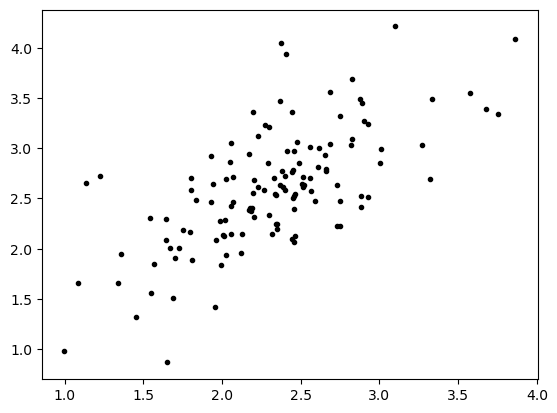

In [43]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

/tmp/ipykernel_77461/395794539.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean 0.667*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean 0.65*** 0.0
Int64Index([], dtype='int64')
v3_mean 0.613*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v4_mean 0.651*** 0.0
Int64Index([], dtype='int64')
a_mean 0.826*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean 0.341*** 9e-05
Int64Index([245], dtype='int64')
ndt1_mean 0.659*** 0.0
Int64Index([12], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt2_mean 0.597*** 0.0
Int64Index([], dtype='int64')
ndt3_mean 0.703*** 0.0
Int64Index([133, 23, 86, 111], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt4_mean 0.655*** 0.0
Int64Index([86], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean 0.599*** 0.0
Int64Index([25, 69, 162, 86], dtype='int64')
alpha_mean 0.594*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = (v2 + v1)-(v3+v4) 0.764*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = (v2 + v1)+ (v3+v4) 0.427*** 0.0
Int64Index([], dtype='int64')
v_w_priming = (v2 - v1) 0.11 0.21697
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_nw_priming = (v4 - v3) 0.203* 0.02235
Int64Index([208], dtype='int64')


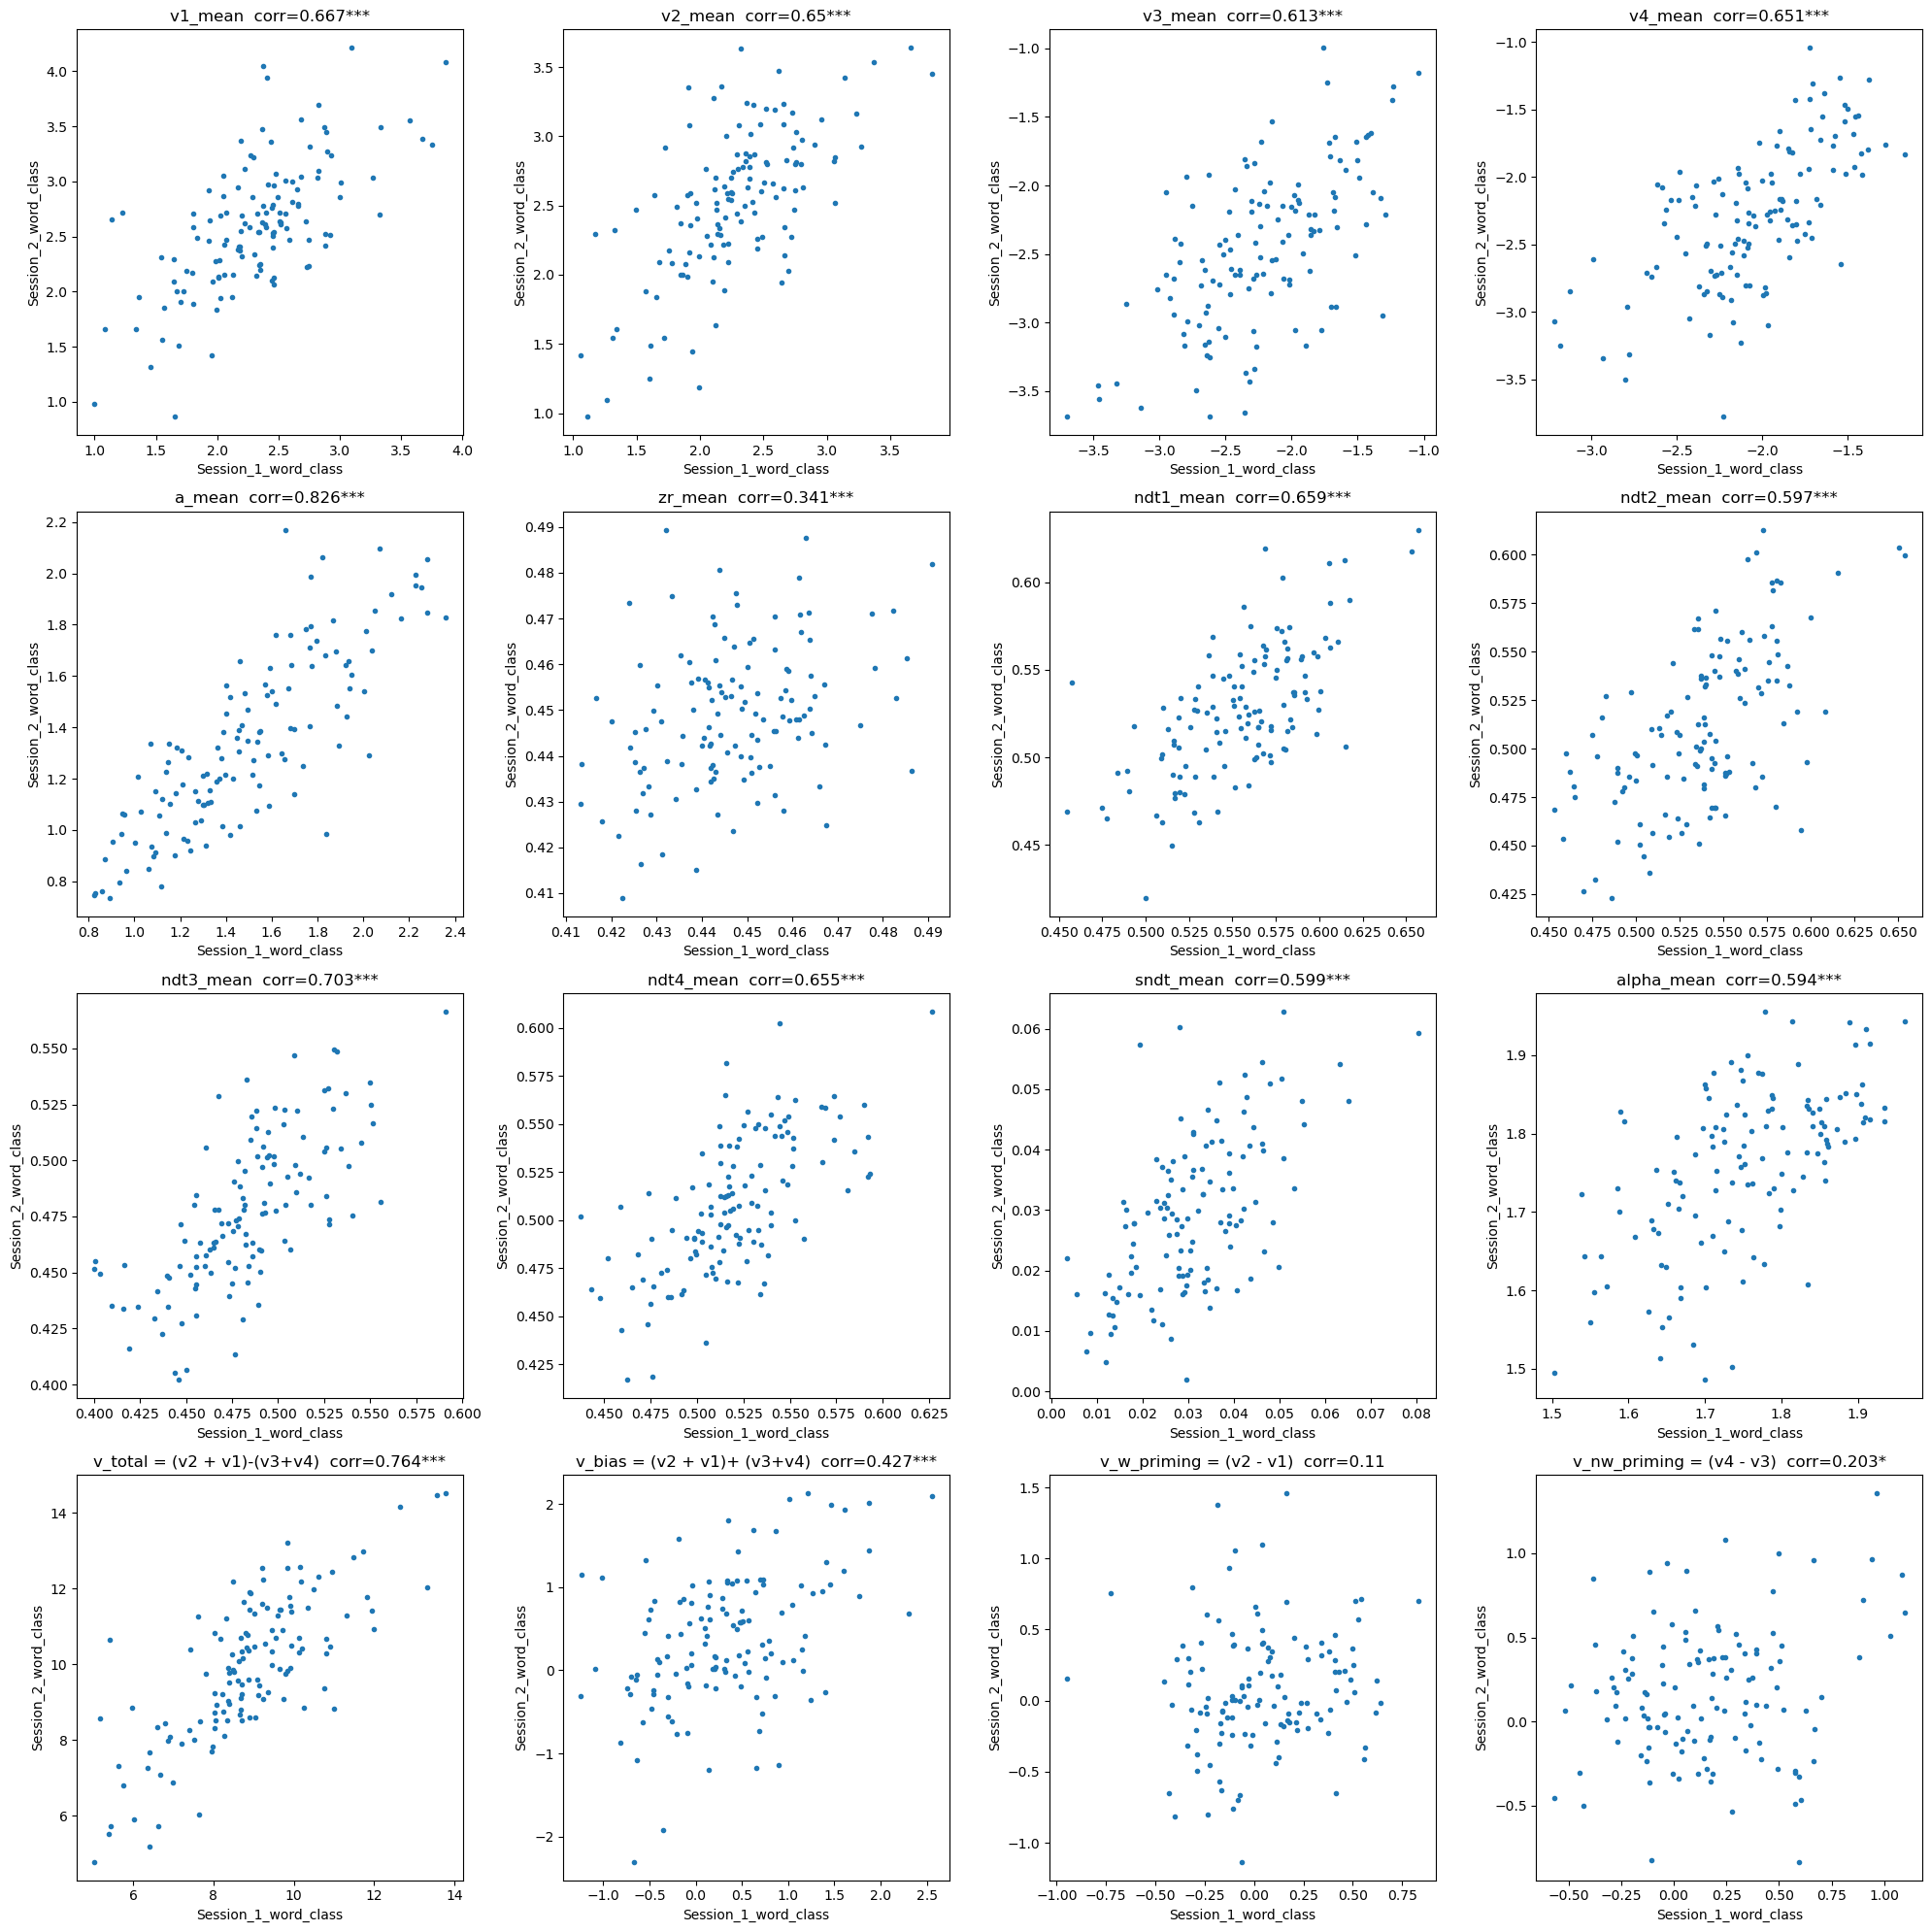

In [48]:
params_mean=['v1_mean','v2_mean','v3_mean','v4_mean','a_mean','zr_mean','ndt1_mean','ndt2_mean','ndt3_mean','ndt4_mean','sndt_mean',
             'alpha_mean','v_total = (v2 + v1)-(v3+v4)','v_bias = (v2 + v1)+ (v3+v4)',"v_w_priming = (v2 - v1)","v_nw_priming = (v4 - v3)"]
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
a=0
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axs = axs.flatten()
from scipy.stats.stats import pearsonr

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param,corr,pvalue)
    print(ind)
  


    #plt.subplot(2,3)
    #plt.plot(x, y, '.', color='black')
    #axs[a].set_xlabel(param)
    axs[a].plot(x, y,'.')
    axs[a].set_title(param+'  corr='+str(corr))
    axs[a].set_xlabel('Session_1_word_class')
    axs[a].set_ylabel('Session_2_word_class')


    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)

    a+=1
    #plt.title('corr ='+str(corr))
    plt.xlabel('Session_1_word_class')
    plt.ylabel('Session_2_word_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    final_corr_frame['corr_'+str(param)] = [corr]
fig.savefig("./Study2_s1s2_corr_.png", dpi=600, bbox_inches='tight')

    
#saving the results 

#final_corr_frame.to_csv('Study2_corr_between_session_word_class.csv',index=False)
final_corr_frame.to_excel("Study2_corr_between_session_word_class.xlsx")

 
    


In [49]:
type(corr)

str

In [50]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_v3_mean,corr_v4_mean,corr_a_mean,corr_zr_mean,corr_ndt1_mean,corr_ndt2_mean,corr_ndt3_mean,corr_ndt4_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = (v2 + v1)-(v3+v4),corr_v_bias = (v2 + v1)+ (v3+v4),corr_v_w_priming = (v2 - v1),corr_v_nw_priming = (v4 - v3)
0,class_words,between session,0.667***,0.65***,0.613***,0.651***,0.826***,0.341***,0.659***,0.597***,0.703***,0.655***,0.599***,0.594***,0.764***,0.427***,0.11,0.203*


In [51]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'with_total_bias_recoverd_param_lerch_voss_mean_median.csv'

In [106]:
df

,Experiment,v1_mean,v2_mean,v3_mean,v4_mean,v_total = (v2 + v1)-(v3+v4),v_bias = (v2 + v1)+ (v3+v4),v_w_priming = (v2 - v1),v_nw_priming = (v4 - v3),zr_mean,...,v3_median,v4_median,zr_median,a_median,ndt1_median,ndt2_median,ndt3_median,ndt4_median,sndt_median,alpha_median
0,1010_associative_priming_part_2.dat,1.657301,1.095961,-1.688869,-1.281330,5.723461,-0.216937,0.561341,0.407538,0.471715,...,-1.653873,-1.255281,0.465051,0.949830,0.559650,0.567803,0.549293,0.549282,0.060992,1.801197
1,2013_associative_priming_part_2.dat,1.909587,2.360618,-2.109468,-2.145208,8.524882,0.015530,-0.451031,-0.035739,0.470965,...,-2.079374,-2.090498,0.462441,0.958097,0.522524,0.539591,0.480753,0.508340,0.053841,1.718826
2,4010_associative_priming_part_2.dat,2.609628,2.624245,-2.505433,-2.564424,10.303730,0.164016,-0.014616,-0.058991,0.452263,...,-2.503838,-2.549852,0.435993,1.611975,0.536738,0.491337,0.477080,0.505530,0.022168,1.863112
3,4006_associative_priming_part_1.dat,2.457990,2.750365,-3.013038,-2.678524,10.899917,-0.483208,-0.292375,0.334514,0.446476,...,-2.991829,-2.642764,0.432800,1.360850,0.508486,0.512588,0.478650,0.517321,0.024819,1.793738
4,1001_associative_priming_part_2.dat,3.488903,2.776075,-3.430081,-2.849159,12.544218,-0.014262,0.712827,0.580922,0.453841,...,-3.412445,-2.822810,0.441301,1.435158,0.497459,0.454633,0.487556,0.497477,0.020914,1.828874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3034_associative_priming_part_1.dat,2.300798,2.129863,-2.747390,-1.718363,8.896413,-0.035092,0.170935,1.029028,0.450663,...,-2.715397,-1.687330,0.437356,1.023915,0.565708,0.535112,0.493667,0.526828,0.039937,1.689084
252,3026_associative_priming_part_2.dat,2.521772,2.537974,-3.657501,-2.577676,11.294923,-1.175430,-0.016202,1.079825,0.445816,...,-3.644076,-2.560006,0.431484,1.180124,0.530999,0.499098,0.463917,0.497870,0.019700,1.780128
253,1005_associative_priming_part_1.dat,2.291836,1.916858,-2.016892,-1.803942,8.029529,0.387860,0.374978,0.212949,0.426205,...,-2.002802,-1.784734,0.410361,1.898149,0.574655,0.547334,0.463959,0.496966,0.014776,1.907089
254,1021_associative_priming_part_2.dat,2.003999,1.987010,-2.094305,-1.586185,7.671499,0.310519,0.016988,0.508120,0.459300,...,-2.075504,-1.545810,0.447639,1.061746,0.536891,0.538348,0.551083,0.546464,0.048131,1.730241


# class_pictures

In [52]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v3_mean,v4_mean,v_total = (v2 + v1)-(v3+v4),v_bias = (v2 + v1)+ (v3+v4),v_w_priming = (v2 - v1),v_nw_priming = (v4 - v3),zr_mean,...,v3_median,v4_median,zr_median,a_median,ndt1_median,ndt2_median,ndt3_median,ndt4_median,sndt_median,alpha_median


In [23]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')

In [24]:
data_analysis = {'Experiment':df_class_pictures_1['Experiment'],'par_1':np.array(df_class_pictures_1['v1_mean']),'par_2':np.array(df_class_pictures_2['v1_mean'])}
data_analysis
corr_frame = pd.DataFrame(data_analysis)
corr_frame

,Experiment,par_1,par_2
171,001_class_pictures_part_1.dat,2.631589,3.142965
400,002_class_pictures_part_1.dat,2.775742,2.550106
355,003_class_pictures_part_1.dat,2.184253,2.836046
86,004_class_pictures_part_1.dat,2.350880,2.263182
401,005_class_pictures_part_1.dat,2.090355,2.295909
...,...,...,...
266,4009_class_pictures_part_1.dat,2.489222,2.151345
269,4010_class_pictures_part_1.dat,2.902879,4.171052
83,4011_class_pictures_part_1.dat,1.080112,1.266913
411,4012_class_pictures_part_1.dat,2.257025,2.048675


In [25]:
df_x = corr_frame[['par_1', 'par_2']]


In [26]:
df_x = corr_frame[['par_1', 'par_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[['par_1', 'par_2']])
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_outliers=df_x.loc[df_x.p_value < 0.001]
ind=df_outliers.index
print(ind)

Int64Index([258], dtype='int64')


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.6661348356836365
v_bias = v2 + v1


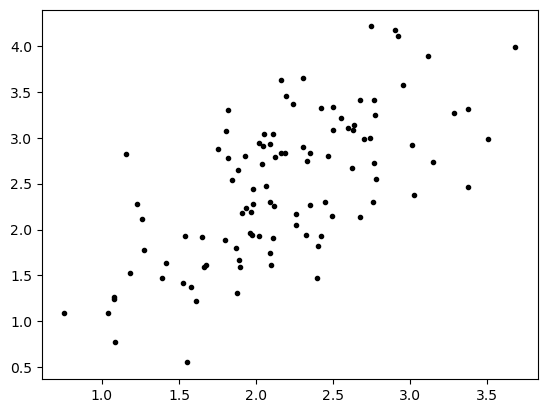

In [27]:
corr_without_outlier = corr_frame.drop(ind)
x = corr_without_outlier['par_1']
y = corr_without_outlier['par_2']
corr =  np.corrcoef(x, y)[0,1]
print(corr)
print(param)
plt.plot(x, y, '.', color='black')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([258], dtype='int64')
v1_mean


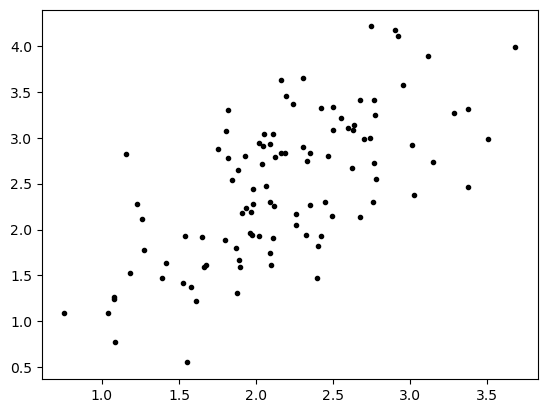

Int64Index([359], dtype='int64')
v2_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


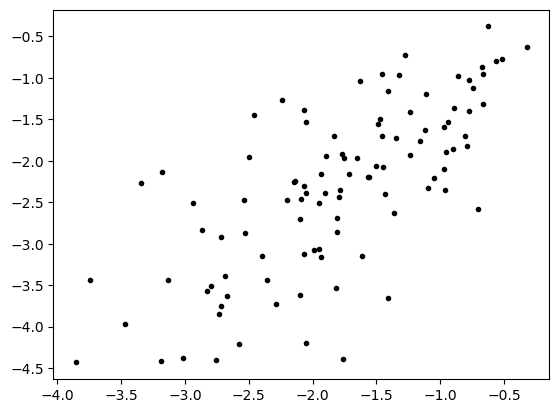

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([223], dtype='int64')
zr_mean


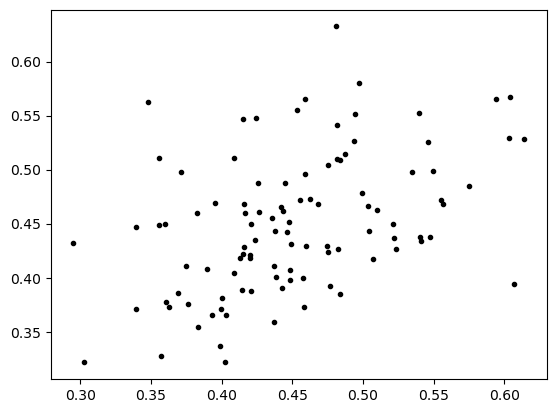

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
a_mean


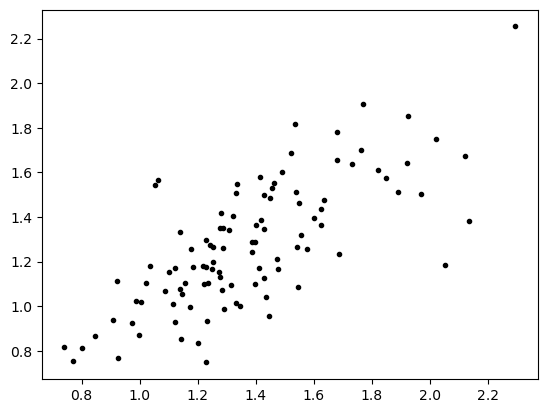

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([409], dtype='int64')
ndt_mean


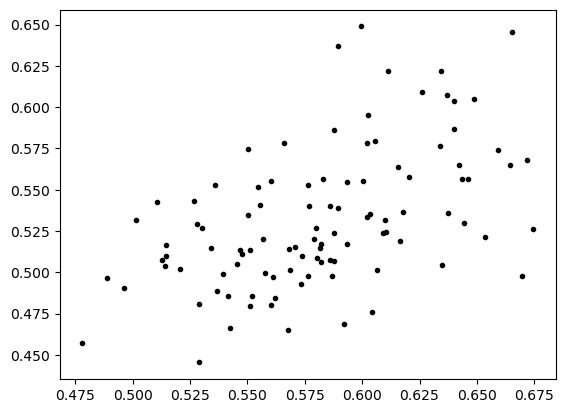

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([152, 223], dtype='int64')
sndt_mean


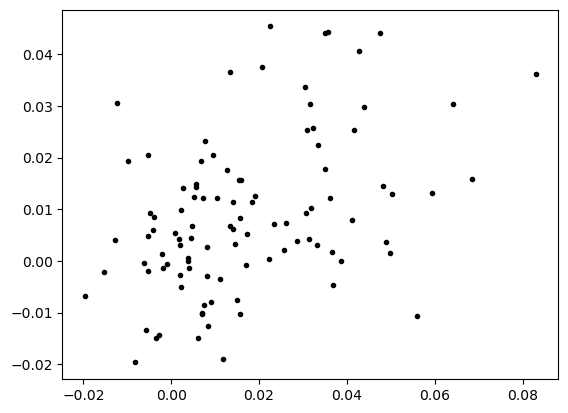

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([2, 409, 327], dtype='int64')
alpha_mean


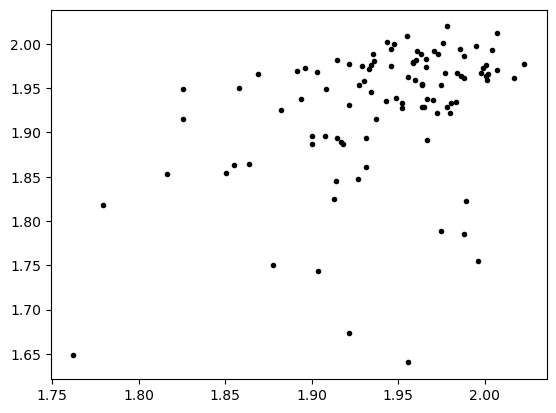

Int64Index([], dtype='int64')
v_total = v2 - v1


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


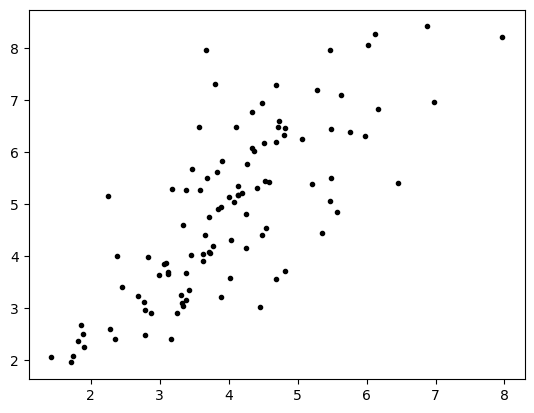

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v_bias = v2 + v1


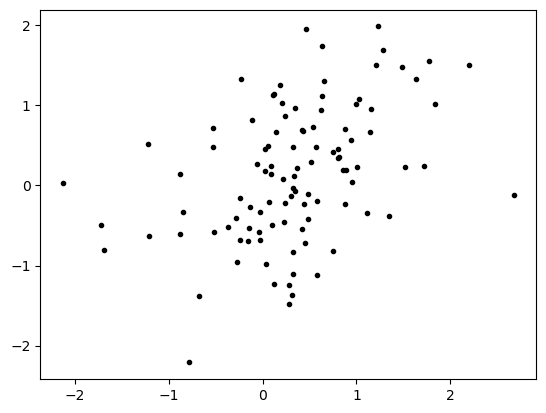

In [29]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [30]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.666135,0.712565,0.43526,0.731934,0.514505,0.420097,0.403703,0.768859,0.422742
